In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ***Data Exploration***

In [2]:
df = pd.read_csv(r"breast_cancer.csv", encoding="latin1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [4]:
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [5]:
df.shape

(683, 10)

In [6]:
df.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [7]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [8]:
replacements = {
    2 : 0,
    4 : 1
}
df["Class"] = df["Class"].replace(replacements)

# ***Logistic Regression (Scratch)***

In [9]:
class LogisticRegressionScratch:

    @staticmethod
    def sigmoid(z):
        return (1 / (1 + np.exp(-z)))

    @staticmethod
    def classify(y):
        return (y >= 0.5).astype(int)

    def log_loss(self, y, y_pred):
        return -(1/len(y))*np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y, learning_rate=0.01, iterations=10000):
        y = y.reshape(-1, 1)
        n = len(X)
        self.coef_ = np.zeros((X.shape[1], 1))
        self.intercept_ = 0
        for _ in range(iterations):
            z = X @ self.coef_ + self.intercept_
            y_pred = LogisticRegressionScratch.sigmoid(z)
            errors = y_pred - y
            dw = (1/n) * (X.T @ errors)
            db = (1/n) * np.sum(errors)
            self.coef_ -= learning_rate * dw
            self.intercept_ -= learning_rate * db

    def predict(self, X):
        z = X @ self.coef_ + self.intercept_
        y_pred = LogisticRegressionScratch.sigmoid(z)
        return LogisticRegressionScratch.classify(y_pred)

# ***X, y ___ Split***

In [10]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [11]:
df = df.sample(frac=1).reset_index(drop=True)
split_index = int(0.8 * len(df))
train_data = df[:split_index]
test_data = df[split_index:]
X_train, y_train = train_data[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']].values, train_data["Class"].values
X_test, y_test = test_data[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']].values, test_data["Class"].values

In [12]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

In [13]:
model = LogisticRegressionScratch()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [14]:
predictions.flatten(), y_test.flatten()

(array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0]),
 array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0]))

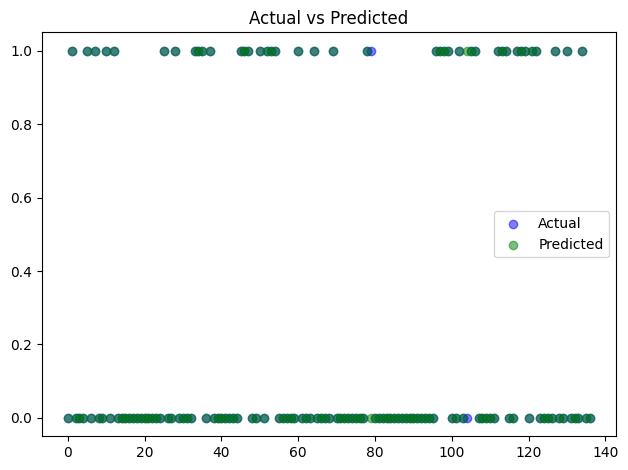

In [15]:
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.5, color="blue")
plt.scatter(range(len(predictions)), predictions, label="Predicted", alpha=0.5, color="green")
plt.legend()
plt.title("Actual vs Predicted")
plt.tight_layout()

In [16]:
f"Model Accuracy : {(np.mean(predictions.ravel() == y_test) * 100)}"

'Model Accuracy : 98.54014598540147'